In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Minimizer, minimize, Parameters, report_fit, fit_report, printfuncs



In [2]:
# Para achar onde está o pacote desejado:
# conda activate envpip
# pip list -v
# /home/maduar/anaconda3/envs/envpip/lib/python3.8/site-packages pip

dat = np.loadtxt('NIST_Gauss2.dat')
x = dat[:, 1]
y = dat[:, 0]


In [3]:
# https://lmfit.github.io/lmfit-py/builtin_models.html?highlight=peaks%20sum#example-3-fitting-multiple-peaks-and-using-prefixes
from lmfit.models import ExponentialModel, GaussianModel

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 250
    # variables        = 8
    chi-square         = 1247.52821
    reduced chi-square = 5.15507524
    Akaike info crit   = 417.864631
    Bayesian info crit = 446.036318
[[Variables]]
    exp_amplitude:  99.0183283 +/- 0.53748735 (0.54%) (init = 162.2102)
    exp_decay:      90.9508860 +/- 1.10310509 (1.21%) (init = 93.24905)
    g1_amplitude:   4257.77319 +/- 42.3833640 (1.00%) (init = 2000)
    g1_center:      107.030954 +/- 0.15006786 (0.14%) (init = 105)
    g1_sigma:       16.6725753 +/- 0.16048161 (0.96%) (init = 15)
    g1_fwhm:        39.2609139 +/- 0.37790530 (0.96%) == '2.3548200*g1_sigma'
    g1_height:      101.880231 +/- 0.59217099 (0.58%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
    g2_amplitude:   2493.41770 +/- 36.1694732 (1.45%) (init = 20

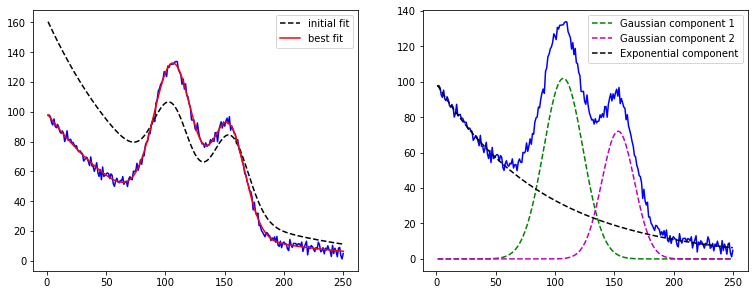

In [4]:
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=105, min=75, max=125)
pars['g1_sigma'].set(value=15, min=3)
pars['g1_amplitude'].set(value=2000, min=10)

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=155, min=125, max=175)
pars['g2_sigma'].set(value=15, min=3)
pars['g2_amplitude'].set(value=2000, min=10)

mod = gauss1 + gauss2 + exp_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.1))

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
axes[0].plot(x, init, 'k--', label='initial fit')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')
axes[1].plot(x, comps['g2_'], 'm--', label='Gaussian component 2')
axes[1].plot(x, comps['exp_'], 'k--', label='Exponential component')
axes[1].legend(loc='best')

plt.show()
# <end examples/doc_builtinmodels_nistgauss.py>